<h1><font color="black">Project 6</font></h1>

In [137]:
import numpy as np
import matplotlib.pyplot as plt

<h2><font color="black">RC Circuit</font></h2>

<h3><font color="black">Voltage Verification</font></h3>

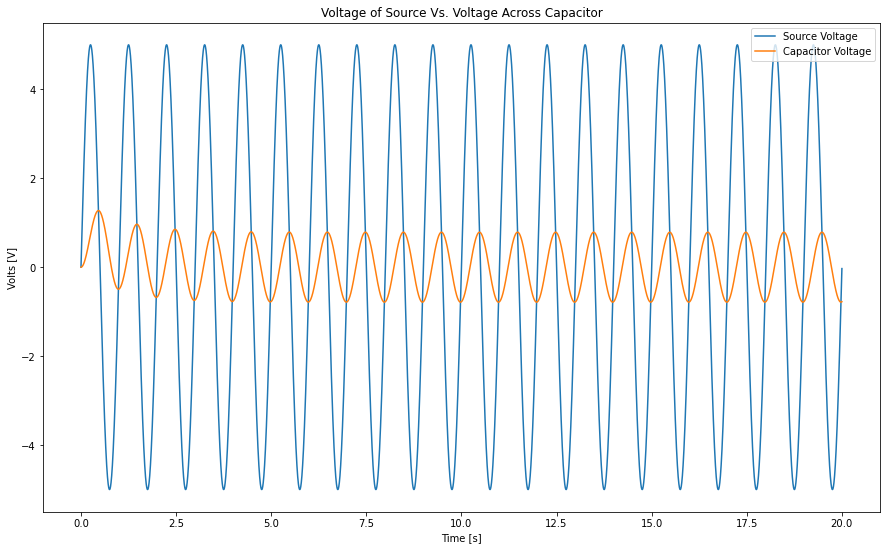

In [138]:
# Initialize values
R = 100     #Ohms
C = 0.01    #F
t = 0       #s
dt = 0.001  #s
Q = 0       #F

# V = A * sin(2 * pi * f * dt) + DC_OFFSET
A = 5       #V
f = 1       #Hz
DC_OFFSET = 0
omega = 2*np.pi*f
vt = A*np.sin(omega*t) + DC_OFFSET
Vc = Q/C

# Initialize lists
time = []
Vcl = []
Vct = []

# Set up matrices / Not Working Out For Me
# A = np.array([[-1/R, 1/R, 1.], [1/R, (-1/R)-(C/dt), 0], [1, 0, 0]])
# b = np.array([Va, Vb, IVi])
# x = np.linalg.solve(A, b)

# print(A)
# print(b)
# print(x)

# zero = np.linalg.solve(A, b)[0]
# Ieq = np.linalg.solve(A, b)[1]
# Vi = np.linalg.solve(A, b)[2]

# Loop and find
while t < 20:
    vt = A*np.sin(omega*t) + DC_OFFSET
    dq = dt*(vt-Q/C)/R
    Q += dq
    Vc = Q/C
    # Theoretical Calculation
    Vtc = vt*(1-np.exp(-t/(R*C)))
    t += dt
    time.append(t)
    Vct.append(vt)
    Vcl.append(Vc)

# Make the figure bigger
plt.figure(figsize=(15,9))
plt.title("Voltage of Source Vs. Voltage Across Capacitor")
plt.xlabel("Time [s]")
plt.ylabel("Volts [V]")
plt.plot(time, Vct)
plt.plot(time, Vcl)
plt.legend(['Source Voltage','Capacitor Voltage'])

<h3><font color="black">Bode Plot Verification</font></h3>

Cutoff Frequency: 0.16 Hz (denoted by red vertical line)


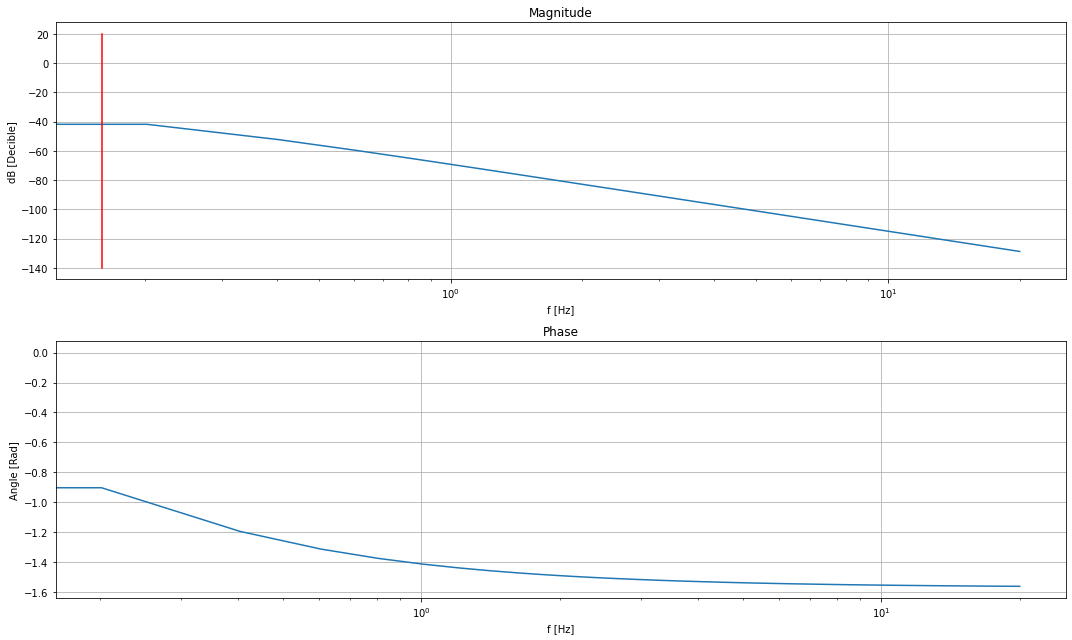

Note: The Passband is to left of the cutoff frequency and the Stopband is to the right.


In [139]:
# Initialize values and space frequency evenly
f = np.linspace(0,20,100) #Hz
R = 100                   #Ohms
C = 0.01                  #F
omega = 2*np.pi*f
vout=(1/(1j*R*omega*C+1.))
f_cutoff = 1/(2*np.pi*R*C)
dB = 20*np.log(np.abs(vout)/5)

print("Cutoff Frequency: %.2f" % f_cutoff, "Hz (denoted by red vertical line)")

# Make the figure bigger
plt.figure(figsize=(15,9))
plt.subplot(2,1,1)      
# Plot the frequency vs. dB
plt.plot(f, dB)
# Plot a line for the filter cut frequency
plt.plot([f_cutoff,f_cutoff],[-140,20],color="red") 
plt.title("Magnitude")
plt.xlabel("f [Hz]")
plt.ylabel("dB [Decible]")
# Set logarithmic scale
plt.xscale("log")           
plt.grid(True)

plt.subplot(2,1,2)
# Plot the amplitude, the absolute of the complex number
plt.plot(f,np.angle(vout))
plt.title("Phase")
plt.xlabel("f [Hz]")
plt.ylabel("Angle [Rad]")
# Set logarithmic scale
plt.xscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Note: The Passband is to left of the cutoff frequency and the Stopband is to the right.")

<h3><font color="black">Comments on Values Chosen For RC Circuit</font></h3>

<h4><font color="black">I initially tried values of R = 100K, C = 1nF, f = 1000 Hz in order to mimc what was in the lecture slides. Due to "overflow encountered in double_scalars" I adjusted the values to R = 100, C = 0.01, f = 1. That said, V = 5 has worked well as an initial voltage input. Furthermore, I also tried a time step of 1 second, but that did not yield the behavior we want. The behavior was found to be as expected for dt = 0.1, dt = 0.01, and dt = 0.001. Lastly, the simulation length runs for 20 time steps in order to best visualize the output behavior.</font></h4>

<h2><font color="black">Half-Wave Rectifier</font></h2>

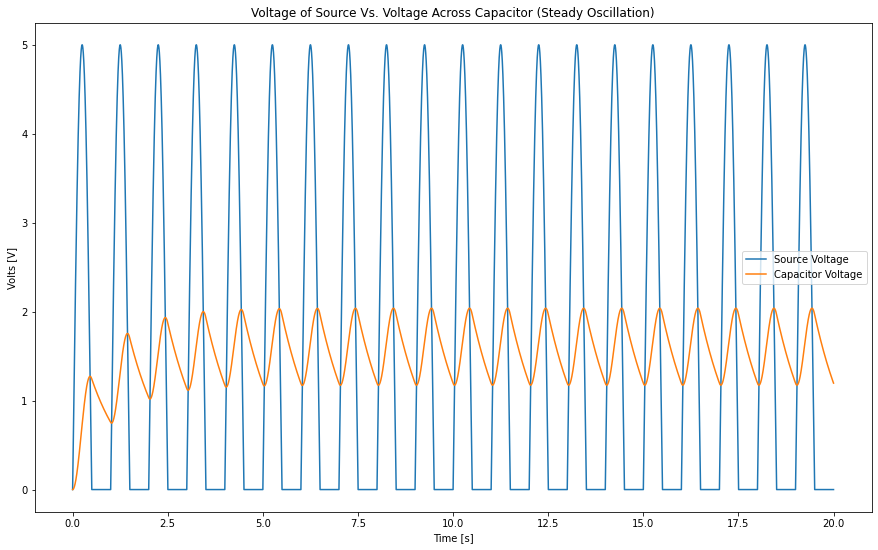

In [140]:
# Initialize values
R = 100     #Ohms
C = 0.01    #F
t = 0       #s
dt = 0.001  #s
Q = 0       #F

# V = A * sin(2 * pi * f * dt) + DC_OFFSET
A = 5       #V
f = 1       #Hz
DC_OFFSET = 0
omega = 2*np.pi*f
vt = A*np.sin(omega*t) + DC_OFFSET
Vc = Q/C

# Initialize lists
time = []
Vcl = []
Vct = []

# Set up matrices / Not Working Out For Me
# A = np.array([[-Gdeq, Gdeq, 1.], [Gdeq, -Gdeq-(-1/R)-(C/dt), 0], [1, 0, 0]])
# b = np.array([Va, Vb, IVi])
# x = np.linalg.solve(A, b)

# print(A)
# print(b)
# print(x)

# Ideq = np.linalg.solve(A, b)[0]
# # Iceq-Ideq
# Idiff = np.linalg.solve(A, b)[1]
# Vi = np.linalg.solve(A, b)[2]

# Loop and find
while t < 20:
    vt = A*np.sin(omega*t) + DC_OFFSET
    if(vt <= 0):
        vt = 0
    else:
        vt = vt
    dq = dt*(vt-Q/C)/R
    Q += dq
    Vc = Q/C
    # Theoretical Calculation
    Vtc = vt*(1-np.exp(-t/(R*C)))
    t += dt
    time.append(t)
    Vct.append(vt)
    Vcl.append(Vc)

# Make the figure bigger
plt.figure(figsize=(15,9))
plt.title("Voltage of Source Vs. Voltage Across Capacitor (Steady Oscillation)")
plt.xlabel("Time [s]")
plt.ylabel("Volts [V]")
plt.plot(time, Vct)
plt.plot(time, Vcl)
plt.legend(['Source Voltage','Capacitor Voltage'])

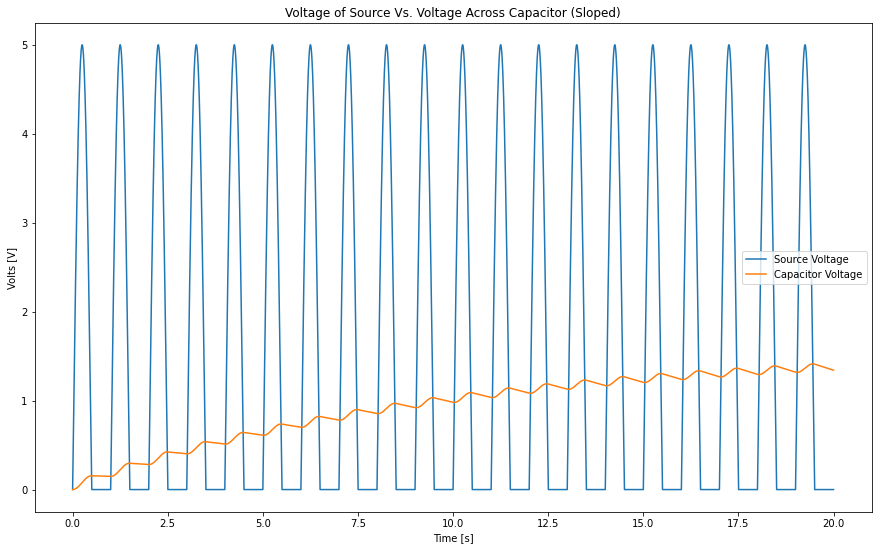

In [141]:
# Initialize values
R = 100e3     #Ohms
C = 0.0001    #F
t = 0       #s
dt = 0.001  #s
Q = 0       #F

# V = A * sin(2 * pi * f * dt) + DC_OFFSET
A = 5       #V
f = 1       #Hz
DC_OFFSET = 0
omega = 2*np.pi*f
vt = A*np.sin(omega*t) + DC_OFFSET
Vc = Q/C

# Initialize lists
time = []
Vcl = []
Vct = []

# Set up matrices / Not Working Out For Me
# A = np.array([[-Gdeq, Gdeq, 1.], [Gdeq, -Gdeq-(-1/R)-(C/dt), 0], [1, 0, 0]])
# b = np.array([Va, Vb, IVi])
# x = np.linalg.solve(A, b)

# print(A)
# print(b)
# print(x)

# Ideq = np.linalg.solve(A, b)[0]
# # Iceq-Ideq
# Idiff = np.linalg.solve(A, b)[1]
# Vi = np.linalg.solve(A, b)[2]

# Loop and find
while t < 20:
    vt = A*np.sin(omega*t) + DC_OFFSET
    if(vt <= 0):
        vt = 0
    else:
        vt = vt
    dq = dt*(vt-Q/C)/R
    Q += dq
    Vc = Q/C
    # Theoretical Calculation
    Vtc = vt*(1-np.exp(-t/(R*C)))
    t += dt
    time.append(t)
    Vct.append(vt)
    Vcl.append(Vc)

# Make the figure bigger
plt.figure(figsize=(15,9))
plt.title("Voltage of Source Vs. Voltage Across Capacitor (Sloped)")
plt.xlabel("Time [s]")
plt.ylabel("Volts [V]")
plt.plot(time, Vct)
plt.plot(time, Vcl)
plt.legend(['Source Voltage','Capacitor Voltage'])

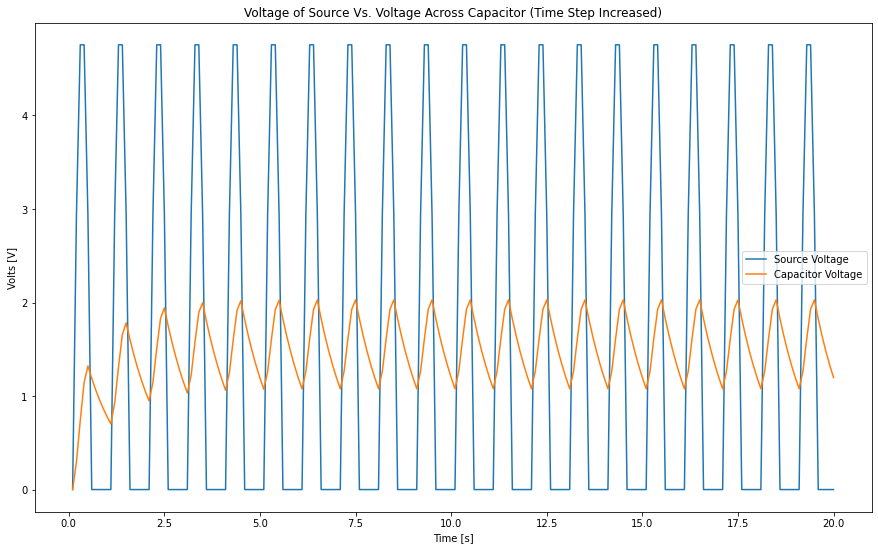

In [142]:
# Initialize values
R = 100     #Ohms
C = 0.01    #F
t = 0       #s
dt = 0.1  #s
Q = 0       #F

# V = A * sin(2 * pi * f * dt) + DC_OFFSET
A = 5       #V
f = 1       #Hz
DC_OFFSET = 0
omega = 2*np.pi*f
vt = A*np.sin(omega*t) + DC_OFFSET
Vc = Q/C

# Initialize lists
time = []
Vcl = []
Vct = []

# Set up matrices / Not Working Out For Me
# A = np.array([[-Gdeq, Gdeq, 1.], [Gdeq, -Gdeq-(-1/R)-(C/dt), 0], [1, 0, 0]])
# b = np.array([Va, Vb, IVi])
# x = np.linalg.solve(A, b)

# print(A)
# print(b)
# print(x)

# Ideq = np.linalg.solve(A, b)[0]
# # Iceq-Ideq
# Idiff = np.linalg.solve(A, b)[1]
# Vi = np.linalg.solve(A, b)[2]

# Loop and find
while t < 20:
    vt = A*np.sin(omega*t) + DC_OFFSET
    if(vt <= 0):
        vt = 0
    else:
        vt = vt
    dq = dt*(vt-Q/C)/R
    Q += dq
    Vc = Q/C
    # Theoretical Calculation
    Vtc = vt*(1-np.exp(-t/(R*C)))
    t += dt
    time.append(t)
    Vct.append(vt)
    Vcl.append(Vc)

# Make the figure bigger
plt.figure(figsize=(15,9))
plt.title("Voltage of Source Vs. Voltage Across Capacitor (Time Step Increased)")
plt.xlabel("Time [s]")
plt.ylabel("Volts [V]")
plt.plot(time, Vct)
plt.plot(time, Vcl)
plt.legend(['Source Voltage','Capacitor Voltage'])

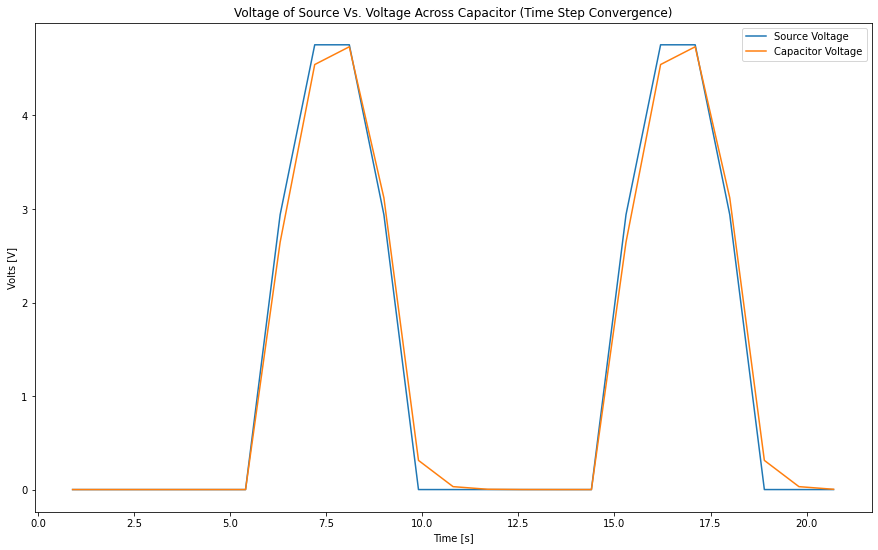

In [143]:
# Initialize values
R = 100     #Ohms
C = 0.01    #F
t = 0       #s
dt = 0.9  #s
Q = 0       #F

# V = A * sin(2 * pi * f * dt) + DC_OFFSET
A = 5       #V
f = 1       #Hz
DC_OFFSET = 0
omega = 2*np.pi*f
vt = A*np.sin(omega*t) + DC_OFFSET
Vc = Q/C

# Initialize lists
time = []
Vcl = []
Vct = []

# Set up matrices / Not Working Out For Me
# A = np.array([[-Gdeq, Gdeq, 1.], [Gdeq, -Gdeq-(-1/R)-(C/dt), 0], [1, 0, 0]])
# b = np.array([Va, Vb, IVi])
# x = np.linalg.solve(A, b)

# print(A)
# print(b)
# print(x)

# Ideq = np.linalg.solve(A, b)[0]
# # Iceq-Ideq
# Idiff = np.linalg.solve(A, b)[1]
# Vi = np.linalg.solve(A, b)[2]

# Loop and find
while t < 20:
    vt = A*np.sin(omega*t) + DC_OFFSET
    if(vt <= 0):
        vt = 0
    else:
        vt = vt
    dq = dt*(vt-Q/C)/R
    Q += dq
    Vc = Q/C
    # Theoretical Calculation
    Vtc = vt*(1-np.exp(-t/(R*C)))
    t += dt
    time.append(t)
    Vct.append(vt)
    Vcl.append(Vc)

# Make the figure bigger
plt.figure(figsize=(15,9))
plt.title("Voltage of Source Vs. Voltage Across Capacitor (Time Step Convergence)")
plt.xlabel("Time [s]")
plt.ylabel("Volts [V]")
plt.plot(time, Vct)
plt.plot(time, Vcl)
plt.legend(['Source Voltage','Capacitor Voltage'])

<h3><font color="black">Comments on Values Chosen For Half-Wave Rectifier</font></h3>

<h4><font color="black">I kept all values the same as the RC circuit for the sake of consistency. Although, depending on the R and C values, you can see that we can have a steady oscillation voltage at the output of the capacitor or something sloped. As for increasing the time step, we can see that this has a clipping effect on the voltage. As the time step gets closer and closr to 1, the source voltage and voltage at the capacitor converge, this is visualized with a time step of 0.9. </font></h4>